In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv(r'C:\Users\asmaj\Downloads\DataSet\amazon_delivery.csv')

In [3]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
df.tail()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


In [5]:
df.sample()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
32688,wusd179774514,28,4.6,12.934365,77.616155,12.964365,77.646155,26-03-2022,23:35:00,23:40:00,Fog,Low,motorcycle,Metropolitian,115,Electronics


In [6]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [8]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [9]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [10]:
 df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])

In [11]:
df['Weather'].isnull().sum()

0

In [12]:
df['Weather'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy'],
      dtype=object)

In [13]:
df['Agent_Rating'].fillna(df['Agent_Rating'].mean(), inplace = True)

In [14]:
df['Agent_Rating'].isnull().sum()

0

In [15]:
df['Traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [16]:
df['Vehicle'].unique()

array(['motorcycle ', 'scooter ', 'van', 'bicycle '], dtype=object)

In [17]:
df['Area'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'Other'], dtype=object)

In [18]:
df[df.duplicated]

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [19]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format = '%d-%m-%Y')

In [20]:
df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors ='coerce').dt.time

C:\Users\asmaj\AppData\Local\Temp\ipykernel_18480\1220415554.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Time'] = pd.to_datetime(df['Order_Time'], errors ='coerce').dt.time


In [21]:
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors = 'coerce').dt.time

C:\Users\asmaj\AppData\Local\Temp\ipykernel_18480\4019953968.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], errors = 'coerce').dt.time


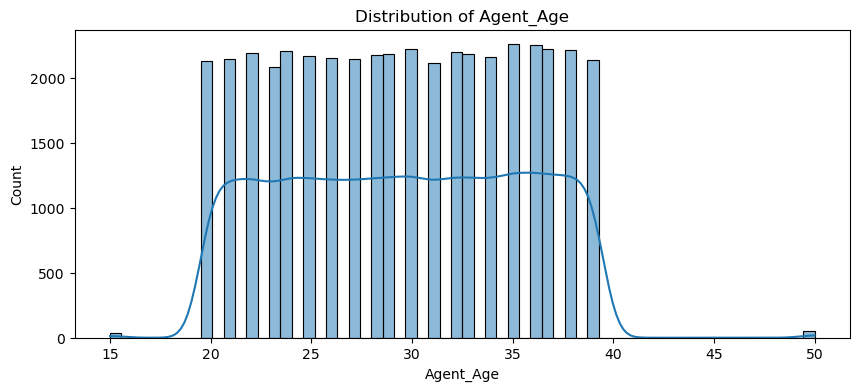

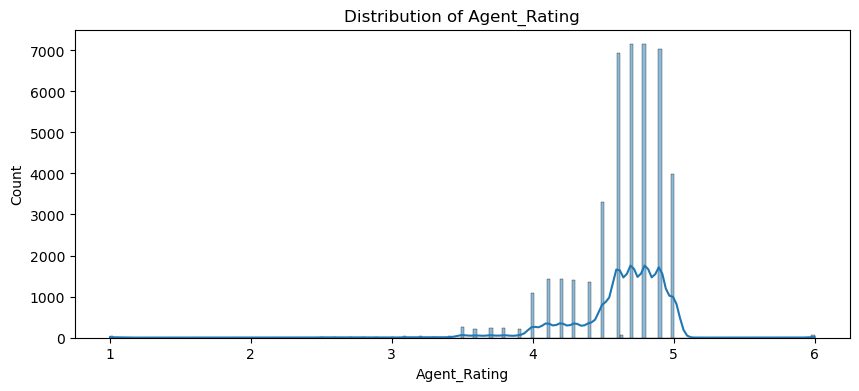

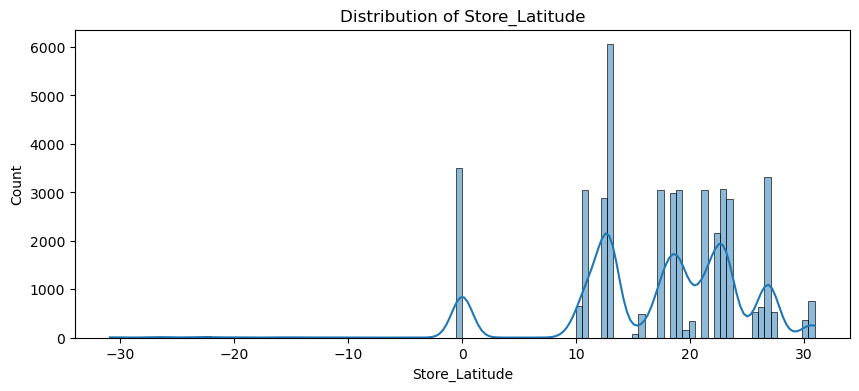

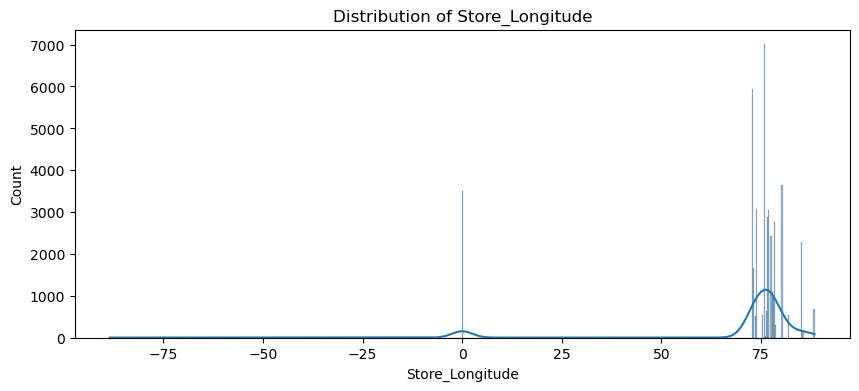

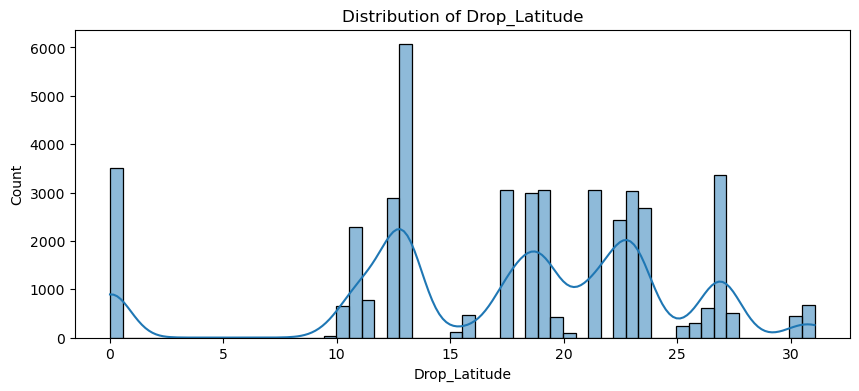

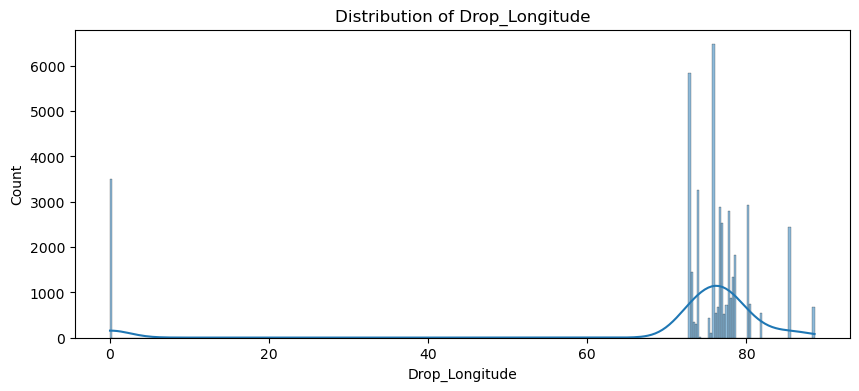

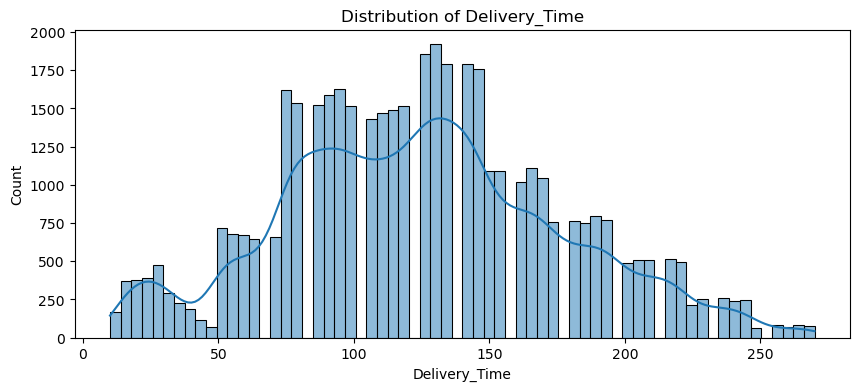

In [22]:
numerical_features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 
                      'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

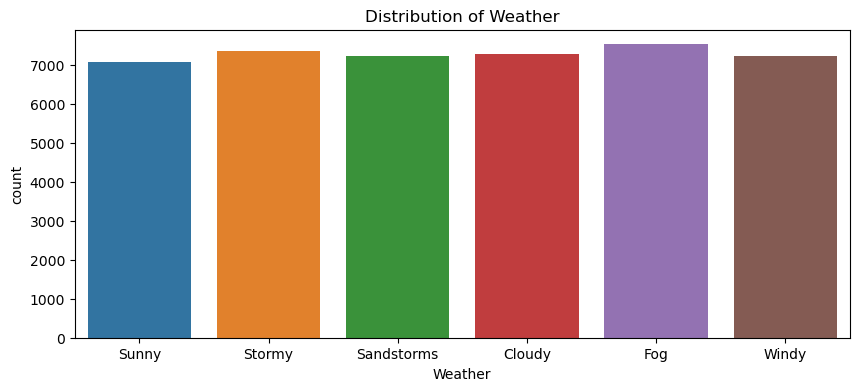

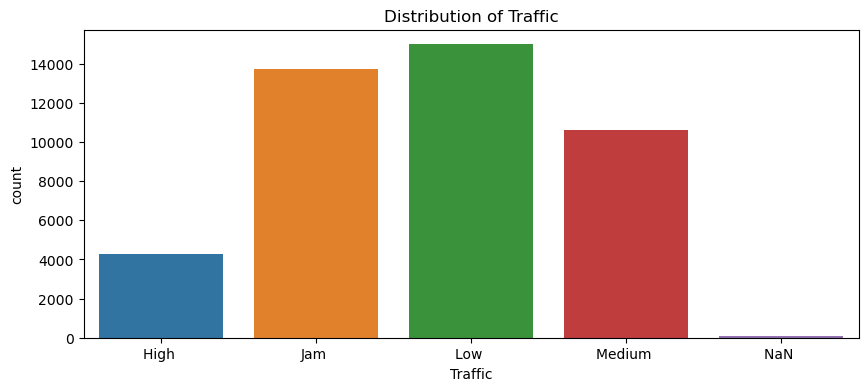

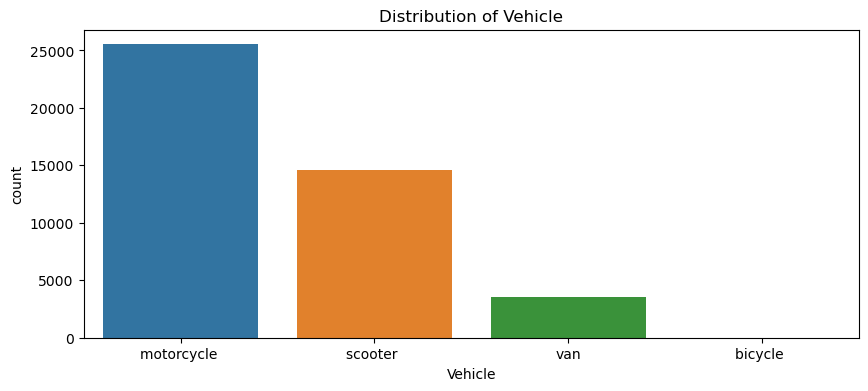

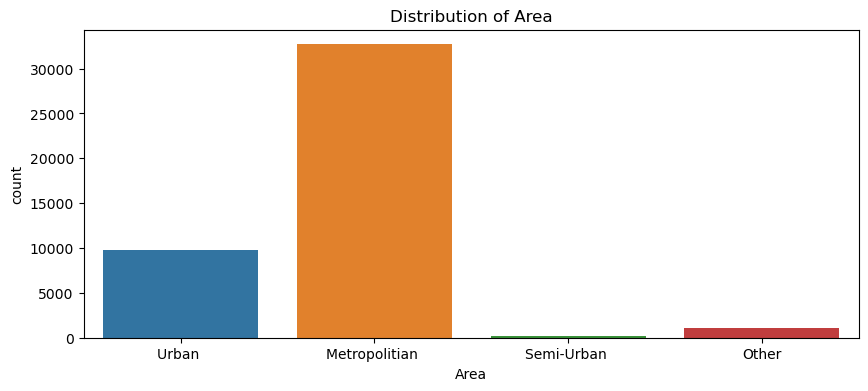

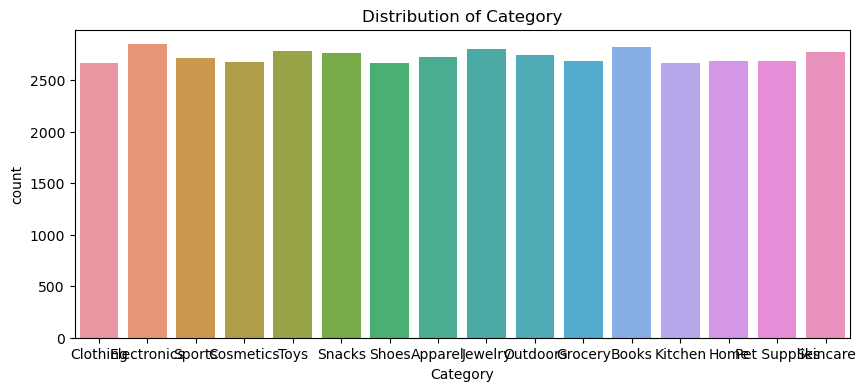

In [23]:
categorical_features = ['Weather', 'Traffic', 'Vehicle', 'Area','Category']

for i in categorical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(data = df, x = i)
    plt.title(f'Distribution of {i}') 
    plt.show()

In [24]:
df.to_csv('Amazon.csv')

In [25]:
df["Delivery_Time_in_hour"] = df['Delivery_Time']/60

In [26]:
df["Delivery_Time_in_hour"].dtypes

dtype('float64')

In [27]:
df['Delivery_Time'].dtypes

dtype('int64')

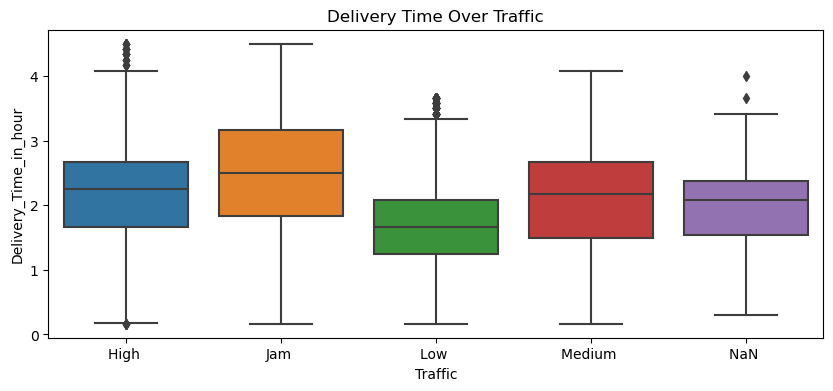

In [28]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df, x = "Traffic" , y="Delivery_Time_in_hour")
plt.title('Delivery Time Over Traffic')
plt.show()


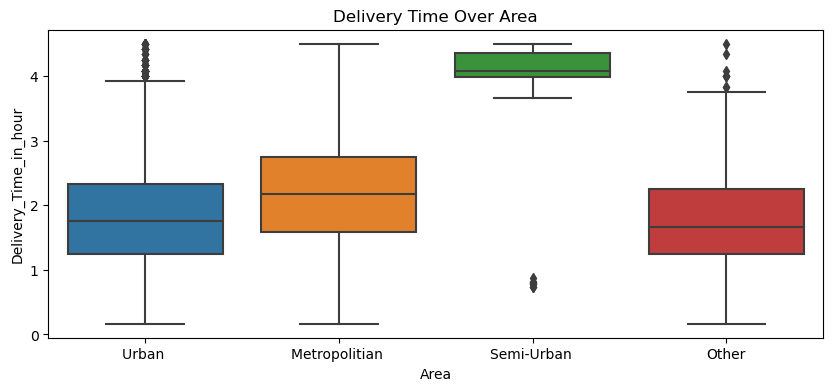

In [29]:
plt.figure(figsize=(10,4))
sns.boxplot(data = df, x = "Area" , y="Delivery_Time_in_hour")
plt.title('Delivery Time Over Area')
plt.show()

In [30]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'Delivery_Time_in_hour'],
      dtype='object')

In [31]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Delivery_Time_in_hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,2.000000
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,2.750000
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,2.166667
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,1.750000
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,2.500000


## Converting categorical to numerical

### Using Label Encoder

In [32]:
LE = LabelEncoder()

In [33]:
df['Weather'] = LE.fit_transform(df['Weather'])

In [34]:
df['Area'] = LE.fit_transform(df['Area'])

In [35]:
df['Vehicle'] = LE.fit_transform(df['Vehicle'])

In [36]:
df['Traffic'] = LE.fit_transform(df['Traffic'])

In [37]:
df['Category'] = LE.fit_transform(df['Category'])

In [38]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Delivery_Time_in_hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,4,0,1,3,120,2,2.000000
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,3,1,2,0,165,4,2.750000
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,2,2,1,3,130,14,2.166667
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,4,3,1,0,105,3,1.750000
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,0,0,2,0,150,15,2.500000


### Cheack outlier for whole data

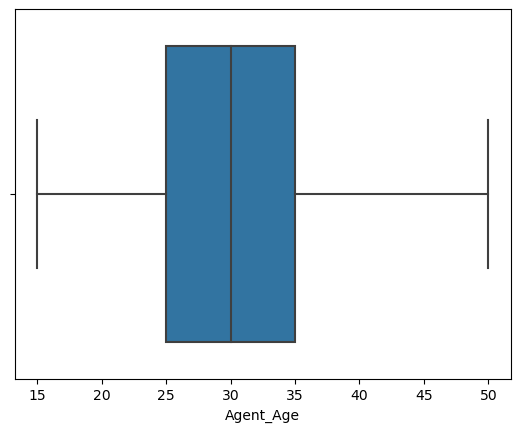

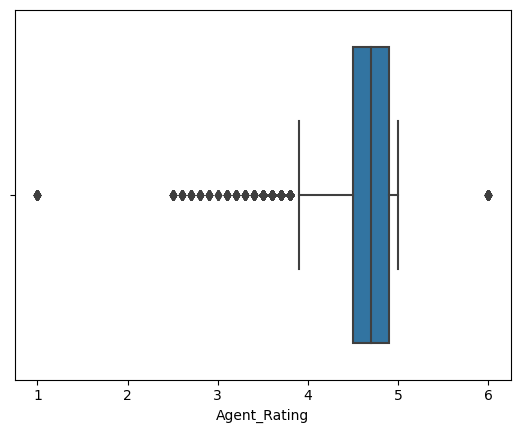

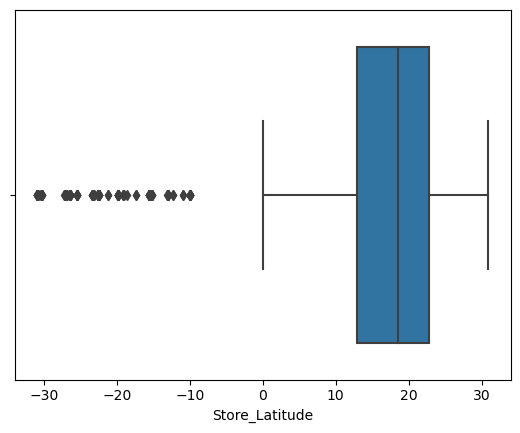

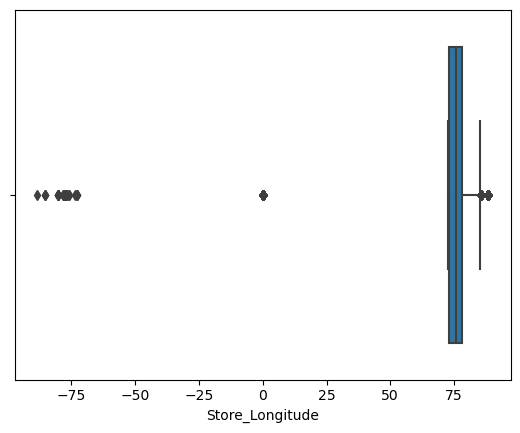

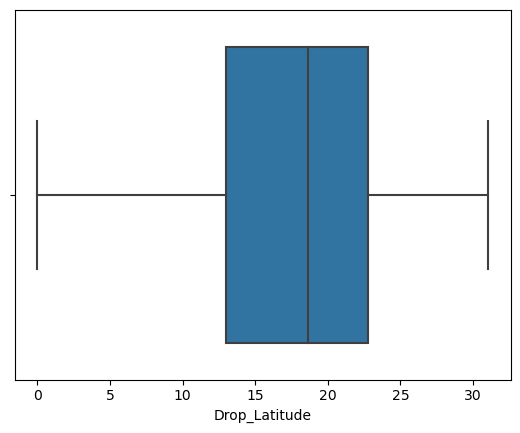

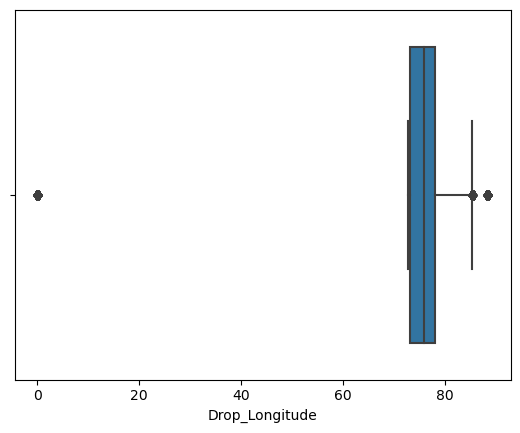

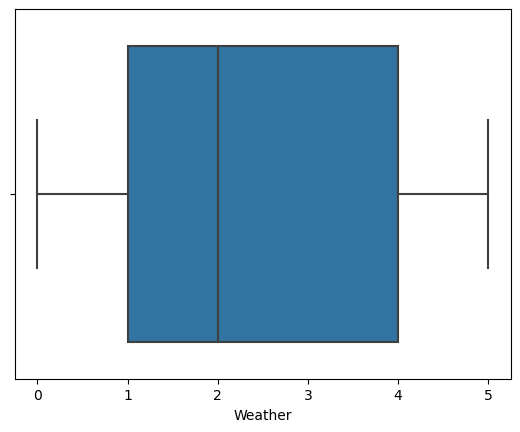

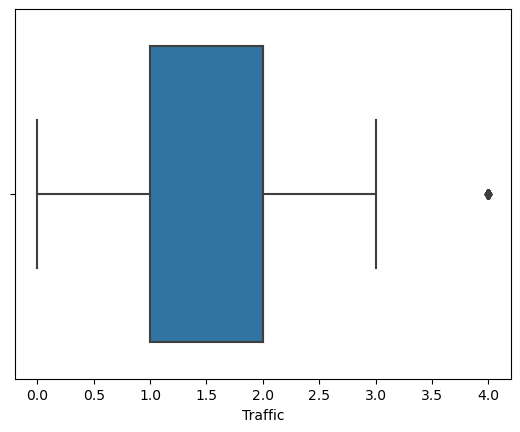

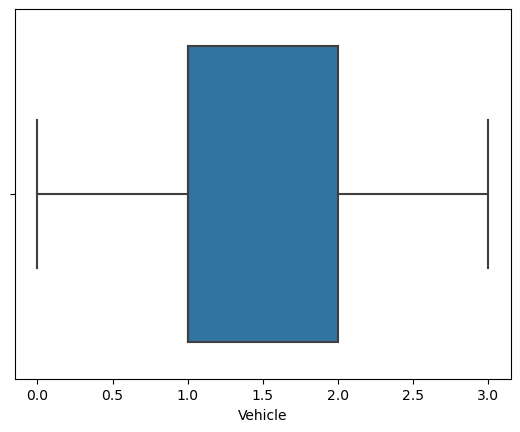

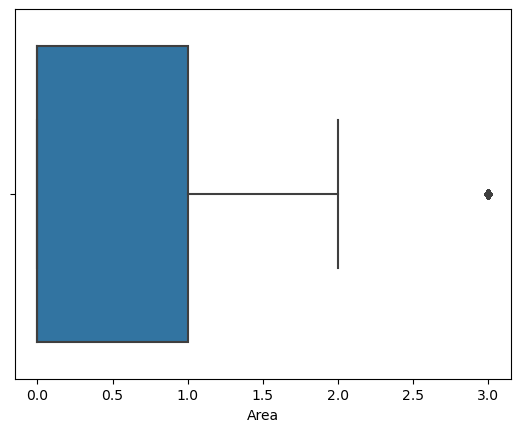

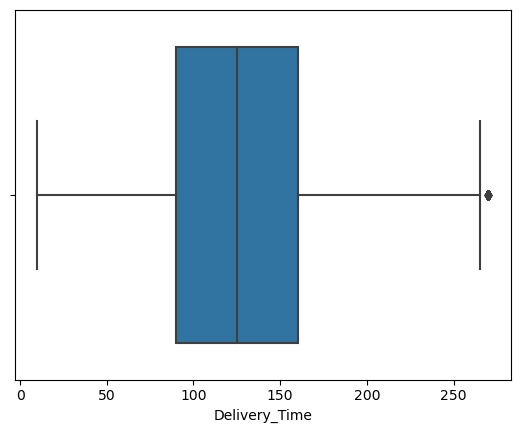

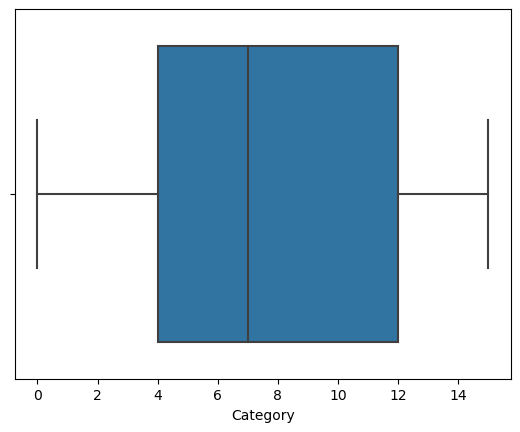

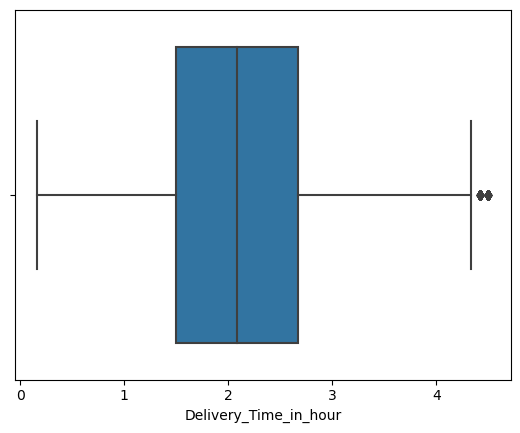

In [39]:
for i in df.select_dtypes(include = ['int','float']):
    sns.boxplot(data = df, x = i)
    plt.show()


### Treat outlier using IQR

In [40]:
def treat_outlier(col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    UB = Q3 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    Upper_Outlier = df[col] > UB
    Lower_Outlier = df[col] < LB
    median = df[col].median()
    df.loc[Upper_Outlier, col] = median
    df.loc[Lower_Outlier, col] = median

In [41]:
for i in df.select_dtypes(['int','float']):
    treat_outlier(i)

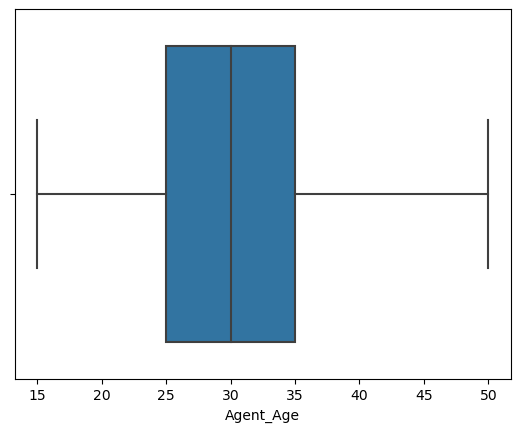

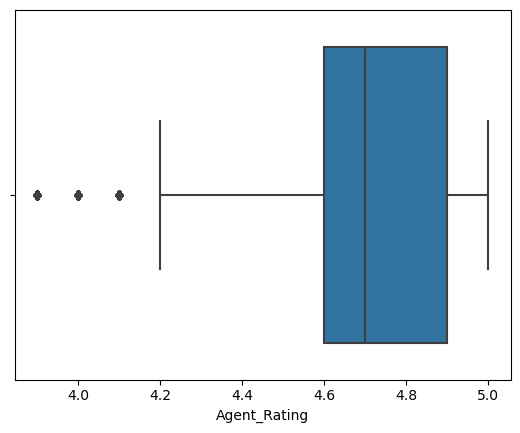

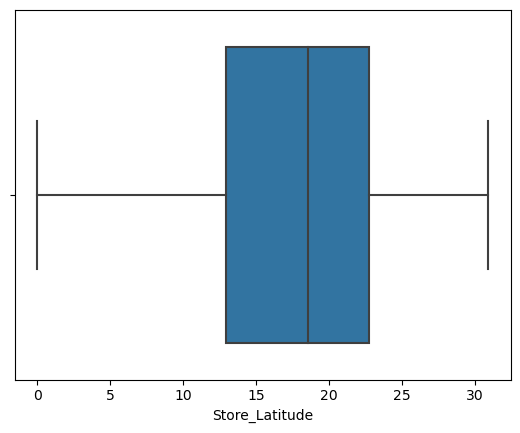

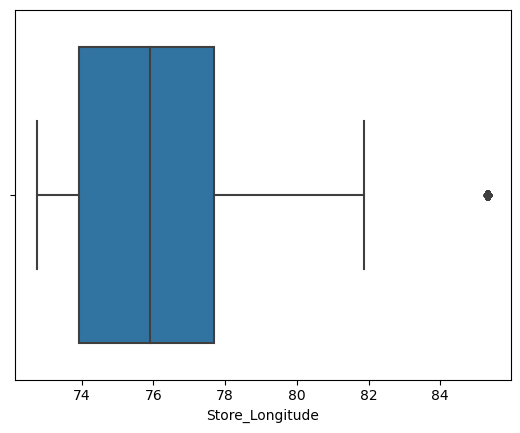

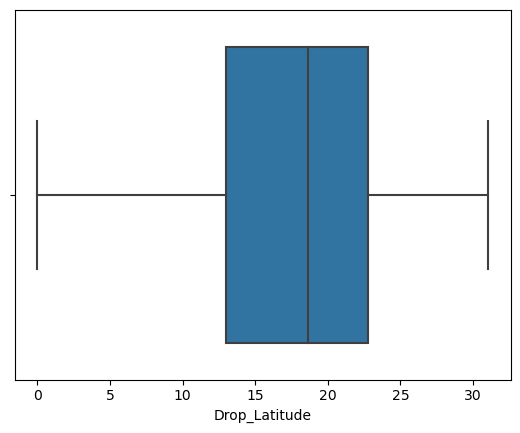

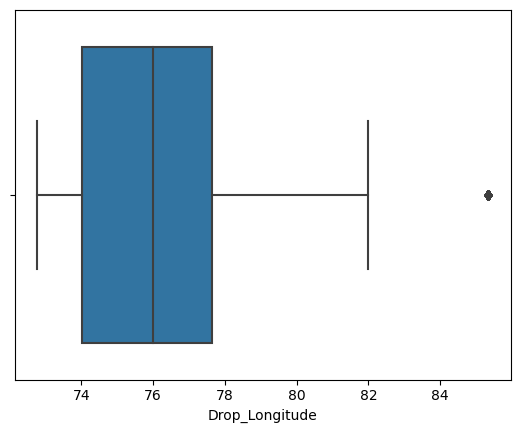

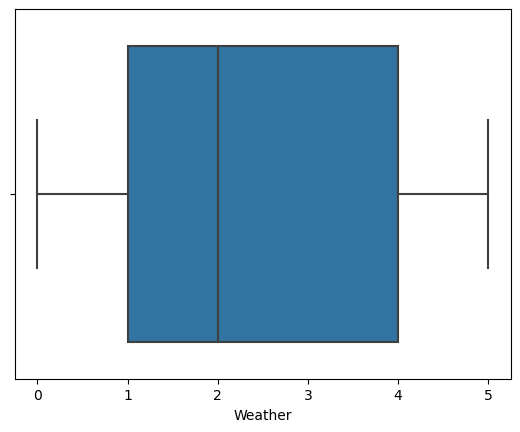

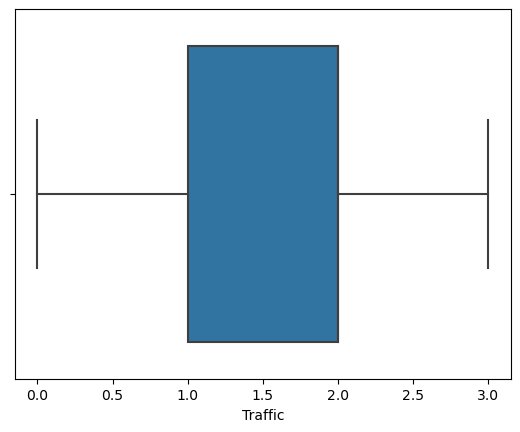

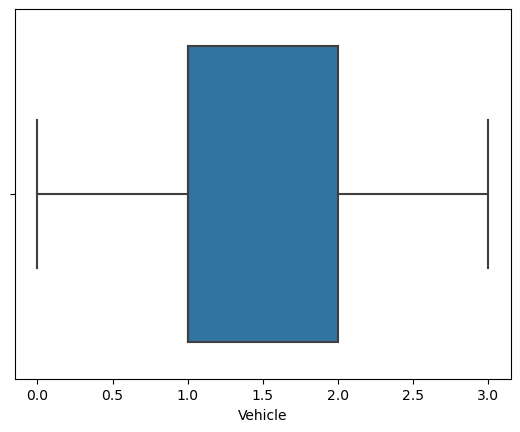

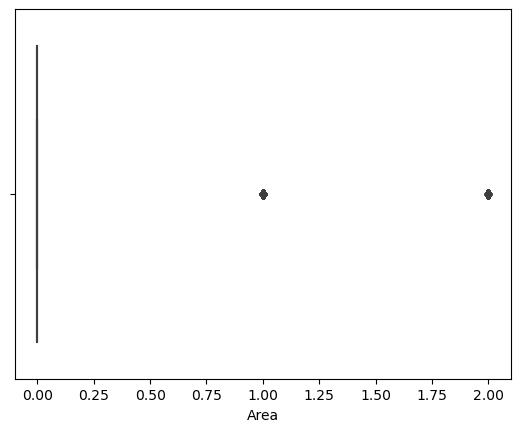

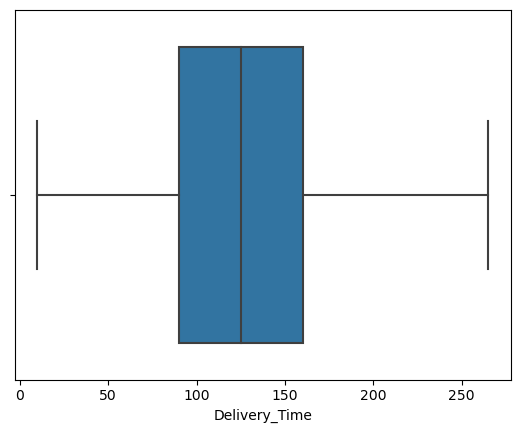

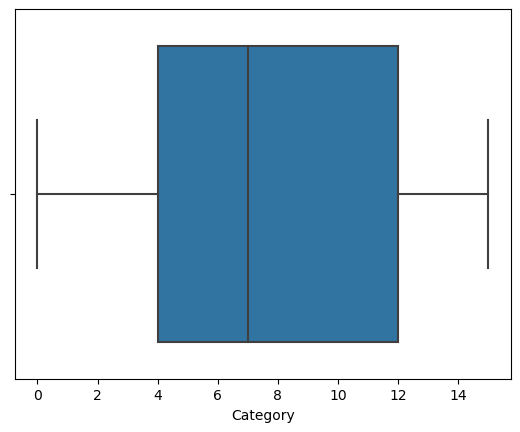

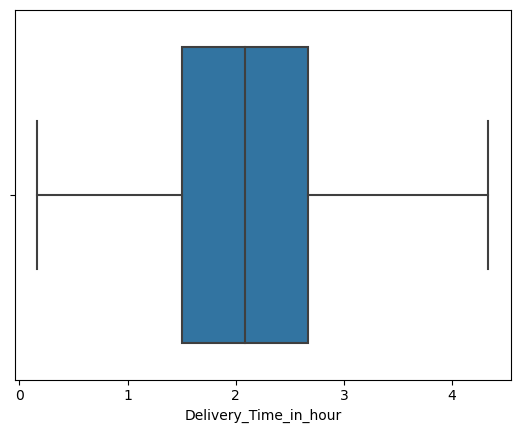

In [42]:
for i in df.select_dtypes(['int','float']):
    sns.boxplot(data = df , x = i)
    plt.show()

### Split the data into x and y

In [43]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'Delivery_Time_in_hour'],
      dtype='object')

In [44]:
 #X = df.drop(['Order_ID','Delivery_Time_in_hour','Order_Time','Pickup_Time','Order_Date'], axis = 1)

In [45]:
X = df[['Weather', 'Traffic', 'Vehicle', 'Area']]

In [46]:
X

,Weather,Traffic,Vehicle,Area
0,4,0,1,0
1,3,1,2,0
2,2,2,1,0
3,4,3,1,0
4,0,0,2,0
...,...,...,...,...
43734,5,0,1,0
43735,5,1,1,0
43736,0,2,2,0
43737,0,0,1,0


In [47]:
y = df['Delivery_Time_in_hour']

In [48]:
y

0        2.000000
1        2.750000
2        2.166667
3        1.750000
4        2.500000
           ...   
43734    2.666667
43735    3.000000
43736    1.333333
43737    2.166667
43738    3.000000
Name: Delivery_Time_in_hour, Length: 43739, dtype: float64

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

## Using Regression Model

### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
LR = LinearRegression()

In [52]:
LR.fit(x_train,y_train)

LinearRegression()

In [53]:
model_predict = LR.predict(x_test)

In [54]:
model_predict

array([1.75027016, 1.69607332, 1.61445271, ..., 2.10520995, 1.83189077,
       2.02255576])

In [55]:
y_test

17967    0.416667
18168    1.416667
25990    2.083333
3153     3.166667
35476    2.333333
           ...   
23178    1.250000
33096    1.916667
38668    2.416667
12503    1.000000
28832    0.500000
Name: Delivery_Time_in_hour, Length: 8748, dtype: float64

In [56]:
LR.score(x_train,y_train)

0.0637841639092539

In [57]:
LR.score(x_test,y_test)

0.063786898834301

### Evaluate the model performance

In [58]:
r2_score(y_test,model_predict)

0.063786898834301

In [59]:
mean_absolute_error(y_test,model_predict)

0.6573744274755827

In [60]:
MSE = mean_squared_error(y_test,model_predict)

In [61]:
np.sqrt(MSE)

0.8191329498235689

### KNeighbors Regressor

In [62]:
KNNR = KNeighborsRegressor(n_neighbors = 20)

In [63]:
KNNR.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [64]:
model_predict = KNNR.predict(x_test)

In [65]:
model_predict

array([1.6125    , 1.4075    , 2.13166667, ..., 2.8       , 1.62083333,
       1.63333333])

In [66]:
y_test

17967    0.416667
18168    1.416667
25990    2.083333
3153     3.166667
35476    2.333333
           ...   
23178    1.250000
33096    1.916667
38668    2.416667
12503    1.000000
28832    0.500000
Name: Delivery_Time_in_hour, Length: 8748, dtype: float64

In [96]:
KNNR.score(x_train,y_train)

0.20359015622085208

In [67]:
r2_score(y_test,model_predict)

0.1822631487835915

In [68]:
mse = mean_squared_error(y_test,model_predict)

In [69]:
np.sqrt(mse)

0.7655504631451175

In [70]:
mean_absolute_error(y_test,model_predict)

0.5902745389422345

### Decision Tree

In [91]:
DTR =  DecisionTreeRegressor()

In [92]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [93]:
model_predict = DTR.predict(x_test)

In [94]:
model_predict

array([1.51975806, 1.3956003 , 2.08560115, ..., 2.36991369, 1.71990291,
       2.10350318])

In [95]:
y_test

17967    0.416667
18168    1.416667
25990    2.083333
3153     3.166667
35476    2.333333
           ...   
23178    1.250000
33096    1.916667
38668    2.416667
12503    1.000000
28832    0.500000
Name: Delivery_Time_in_hour, Length: 8748, dtype: float64

In [97]:
DTR.score(x_train,y_train)

0.24748284822837907

In [99]:
r2_score(y_test,model_predict)

0.22614773542115718

In [100]:
mean_absolute_error(y_test,model_predict)

0.5738084470207093

In [102]:
mse = mean_squared_error(y_test,model_predict)

In [103]:
np.sqrt(mse)

0.7447252307525369